In [1]:
import keras
from src.utilities import load_data_as_set_of_particles
from src.Models.MLP import MLP
from src.Models.PointNet import PointNet
from src import utilities

#### Loading the Data

In [2]:
# Creating the trainning, validation and test set
X_train, y_train = load_data_as_set_of_particles("../Data/HiggsTrainning.csv")
X_val, y_val = load_data_as_set_of_particles("../Data/HiggsValidation.csv")
X_test, y_test = load_data_as_set_of_particles("../Data/HiggsTest.csv")

#### Defining the Model

In [3]:
# Defining the MLP that will be used for all the particles
input_mlp = keras.layers.Input(shape=[7])
mlp = MLP(num_neurons=32)
mlp_model = keras.Model(inputs=input_mlp, outputs=mlp(input_mlp))

# creating the PointNet
input_point_net = keras.layers.Input(shape=[6, 7])
point_net = PointNet(mlp=mlp_model, mlp_output_dim=32)(input_point_net)
output_layer = keras.layers.Dense(2, activation='softmax')(point_net)

# final model
model = keras.Model(inputs=input_point_net, outputs=output_layer)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 6, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ point_net (PointNet)            │ (None, 64)             │         9,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,154 (35.76 KB)

 Trainable params: 8,962 (35.01 KB)

 Non-trainable params: 192 (768.00 B)

In [4]:
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 610us/step - accuracy: 0.5472 - loss: 0.6834 - val_accuracy: 0.6029 - val_loss: 0.6623
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.5935 - loss: 0.6655 - val_accuracy: 0.6086 - val_loss: 0.6552
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.6012 - loss: 0.6591 - val_accuracy: 0.6126 - val_loss: 0.6518
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.6049 - loss: 0.6542 - val_accuracy: 0.6182 - val_loss: 0.6478
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.6111 - loss: 0.6533 - val_accuracy: 0.6242 - val_loss: 0.6445
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.6179 - loss: 0.6491 - val_accuracy: 0.6289 - val_loss: 0.6433
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.6184 - loss: 0.6467 - val_accuracy: 0.6270 - val_loss: 0.6447
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 

#### Quick checks

In [5]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 242us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step


In [6]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train, y_pred=y_train_pred)
print("Validation set:")
utilities.display_metrics(y_true=y_val, y_pred=y_val_pred)
print("Test set:")
utilities.display_metrics(y_true=y_test, y_pred=y_test_pred)

Trainnig set:
Recall: 0.5473
Precision: 0.6749
Confusion Matrix:
[[25826  7964]
 [13677 16533]]
Validation set:
Recall: 0.5270
Precision: 0.6467
Confusion Matrix:
[[6266 2176]
 [3575 3983]]
Test set:
Recall: 0.5227
Precision: 0.6454
Confusion Matrix:
[[7903 2699]
 [4486 4913]]


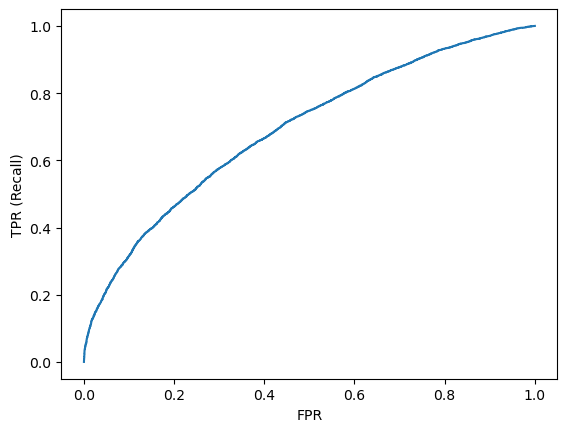

AUC: 0.6925


In [7]:
utilities.display_roc_curve(y_true=y_val, y_pred=y_val_pred)

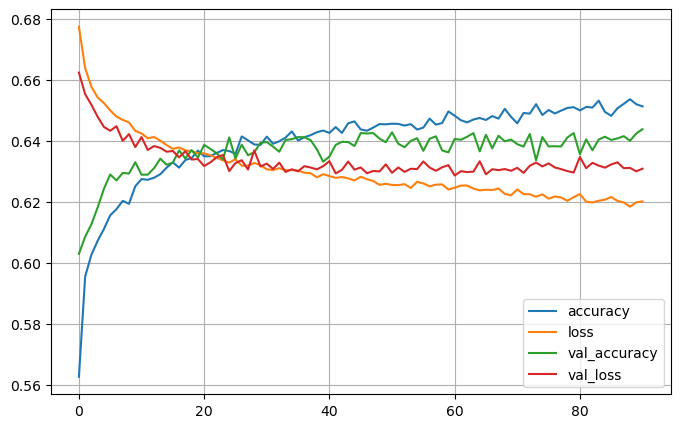

In [8]:
utilities.plot_hist_trainning(history)

In [9]:
utilities.save_model(model, history, "ModelFiles/PointNet")